In [1]:

# Elaborar un modelo predictivo de regresión lineal simple utilizando
# técnicas de validación cruzada y el lenguaje Python para resolver
# un problema.

# Ejercicio: Suponga que le han pedido averiguar si existe una relación entre el
# número de veces que batean los jugadores de un equipo de béisbol y el
# número de runs que consigue. En caso de existir y de establecer un modelo,
# podría predecir el resultado del partido para los siguientes datos:


# generales
import pandas as pd
import numpy as np

# graficos
import matplotlib.pyplot as plt
import seaborn as sns

# modelos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# configuracion matplotlib
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# graficos
import seaborn as sns


# datos

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
"Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
"Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
"Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
"Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654,
735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641,
624, 570, 593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':runs})
datos.head(10)


,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


In [44]:
# 1. Obtenga la distribución de los datos

datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


In [45]:
# 2. Separe sus datos de entrenamiento en 80/20.

X = datos['bateos'].values.reshape(-1,1) #
y = datos['runs'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80 / 20



In [46]:
# 3. Ajuste un modelo de regresión lineal.

modelo = LinearRegression()
modelo.fit(X_train, y_train)



LinearRegression()

In [47]:
# 4. Escriba la recta de regresión que obtuvo con sus estimaciones
# respectivas.


score = modelo.score(X_test, y_test)

print("Model Score (R2):", score)

coefficients = modelo.coef_
intercept = modelo.intercept_
print("Pendiente:", coefficients[0][0])
print("Intercepto:", intercept[0])



Model Score (R2): -0.696415836955206
Pendiente: 0.5962307843506606
Intercepto: -2593.0859682762634


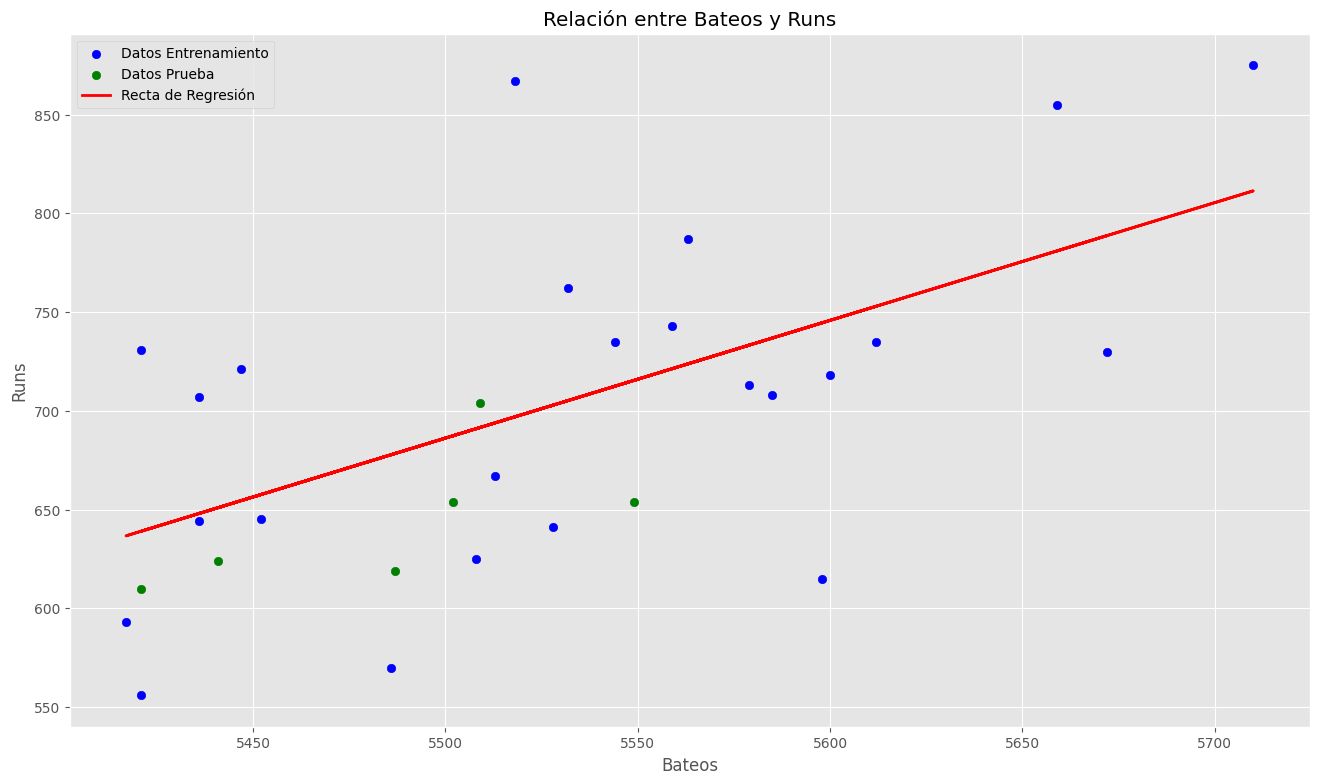

In [48]:
# 5. Obtenga la gráfica de los datos y su recta de regresión

plt.scatter(X_train, y_train, color='blue', label='Datos Entrenamiento')
plt.scatter(X_test, y_test, color='green', label='Datos Prueba')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Recta de Regresión')
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Relación entre Bateos y Runs')
plt.legend()
plt.show()


In [51]:
# 6. Obtenga las métricas: MAE, MSE, RMSE.

y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("Las Métricas son:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Las Métricas son:
MAE: 37.12403785254287
MSE: 1690.9967308093771
RMSE: 41.12173063976487


In [52]:
#7. Concluya con los datos obtenidos y comente la problemática que le han
# planteado al principio.

# El modelo de regresion lineal simple no es el adecuado para este problema
# ya que no se puede predecir el resultado de un partido de beisbol con solo
# el numero de bateos, ya que hay muchos otros factores que influyen en el
# resultado de un partido de beisbol.
